# **Forecasting stocks using timeseries**

#This time will will just get the data then use it for our machine's models

In [64]:
# important libraries
import time
import datetime
import pandas as pd

# Ask user for amount

In [65]:
# Asking user what companies you want to record
tickers = input("Example: AAPl TSLA AMZN GOOG MSFT FB \n\
What companies do you want to forecast? list below in market cap name:  ")
tickers = tickers.split()

Example: AAPl TSLA AMZN GOOG MSFT FB 
What companies do you want to forecast? list below in market cap name:  AAPl TSLA AMZN GOOG MSFT FB 


#Process user input

In [71]:
2# Getting the date of forecasting
from datetime import datetime as date_data 
from datetime import timedelta
# getting yesterday's, years, months and day from x years ago       
years_of_stock =  input("Recommended 5 to 10 years \n\
How many years of stocks do you want to forecast? Numbers only:  ")
yesterday = datetime.datetime.strftime(datetime.datetime.now() - timedelta(1), '%Y-%m-%d')
yesterday_year = int(yesterday[0:4])
yesterday_month = int(yesterday[5:7])
yesterday_day = int(yesterday[8:11])
years_of_stock = int(years_of_stock)*-1 
interval = '1d' # We are collecting data by day
# date given to query string
period1 = int(time.mktime(datetime.datetime(yesterday_year+years_of_stock, yesterday_month, yesterday_day, 23, 59).timetuple())) # starting period 
period2 = int(time.mktime(datetime.datetime(yesterday_year, yesterday_month, yesterday_day, 23, 59).timetuple())) # starting by yesterday's date
# date for graph labels
period1_date = str(yesterday_year+years_of_stock) + "-" +  str(yesterday_month) + "-" +str(yesterday_day)
period2_date = str(yesterday_year) + "-" +  str(yesterday_month) + "-" +str(yesterday_day)

Recommended 5 to 10 years 
How many years of stocks do you want to forecast? Numbers only:  5


In [73]:
# Assigning price values before usage 
list = tickers
amount = list
amount = [item + '_amount' for item in list]

In [75]:
# Collecting all the data accordingly
import pandas as pd
# change every xlsx file into csv files
for i in range(0,len(tickers)):
  xlwriter = pd.ExcelWriter(f'historical prices_{tickers[i]}.xlsx', engine='openpyxl')
  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{tickers[i]}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
  df = pd.read_csv(query_string)
  df.to_excel(xlwriter, sheet_name=tickers[i], index=False)
  xlwriter.save()
  # change into xlsx file
  read_file = pd.read_excel(f"/content/historical prices_{tickers[i]}.xlsx")  
  # change into csv file
  read_file.to_csv (f"historical prices_{tickers[i]}.csv", 
                    index = None,
                    header=True)
  # Removing all other data besides the closing price and the amount of days
  #globals()[X_train[i]], globals()[X_test[i]] =  timesteps[:split_size], timesteps[split_size:]

  #globals()[amount[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Price"]).to_numpy()
  globals()[amount[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"])
  globals()[amount[i]] = globals()[amount[i]].to_numpy()
  globals()[tickers[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})

#Display chosen companies along with chosen year(s)

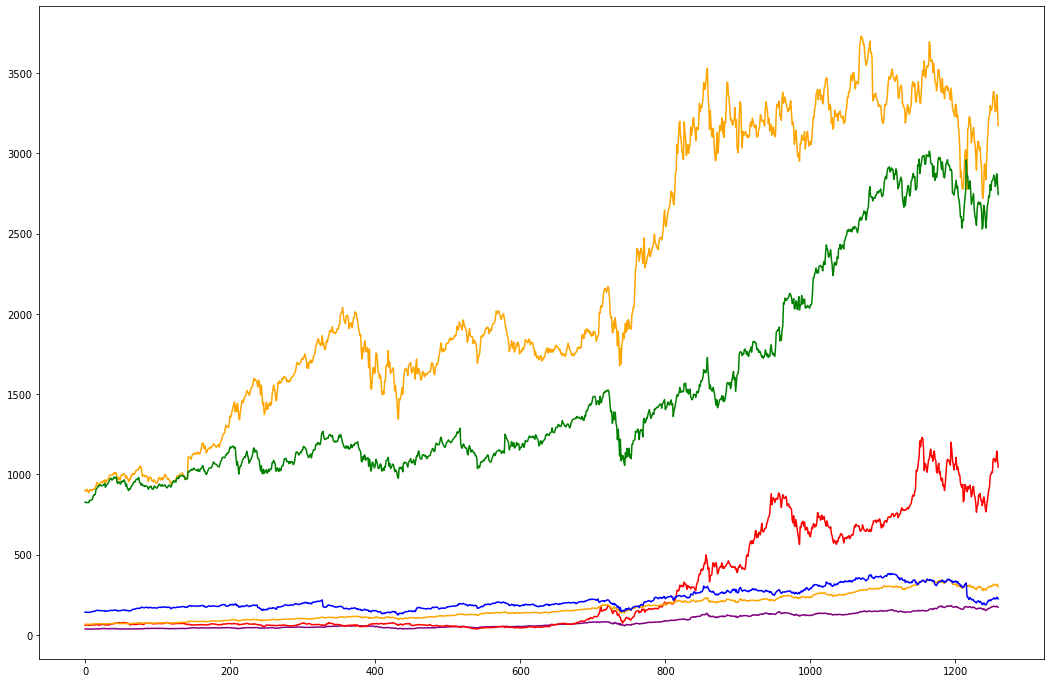

In [76]:
import matplotlib
import random 
from matplotlib import pyplot as plt
# plot the stock graphs
# figurations of our graph 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 12)
fig.savefig('test2png.png', dpi=100)
# random colors for looks
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'gray', 'black']
for i in range(0,len(tickers)):
  random_color = random.choice(colors)
  # This is optional, example this action certain companies
  # ⬇⬇⬇ appear as the color of their logo for example
  if tickers[i] == 'TSLA':
    random_color = 'red'
  if tickers[i] == 'FB':
    random_color = 'blue'
  if tickers[i] == 'GOOG':
    random_color = 'green'
  if tickers[i] == 'AAPL':
    random_color = 'gray'
  if tickers[i] == 'AMZN':
    random_color = 'orange'
  # ⬆⬆⬆ companies out of the block would be assigned a random color
  plt.plot(pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"}), color=random_color)

#Display Chosen Train and Test split amongst datasets




In [77]:
# since again all of the data starts and ends in the same date they would have the same timesteps
# so one is good enough and turing the prices to numpy
# Then again ask the amount of data you want in the test and train section
timesteps = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"].index.to_numpy()
for i in range(0,len(tickers)):
  globals()[tickers[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"]
  globals()[tickers[i]]  = globals()[tickers[i]].to_numpy()

In [78]:
# Make a new name based on tickers to name variables into user
# entered name for example "GOOG" would be it's own varible
tickers_name = []
# for the whatever amount of tickers aka asked companies
# make a variable equal to tickers
for i in range(0,len(tickers)):
  tickers_name.append(tickers[i])
  
  tickers_name[i] = tickers[i]
# Making a X_train, y_train, X_test and y_test for every company 
# for example: GOOG would have it's own split data being named
# as GOOG_X_train, GOOG_y_train, GOOG_X_test and GOOG_y_test
# Along with every single company(ies) entered
list = tickers_name
X_train = list
X_test = list
y_train = list
y_test = list
# Making X_train, y_train, X_test and y_test variables 
# for every company in list 
X_train = [item + '_X_train' for item in list]
X_test = [item + '_X_test' for item in list]
y_train = [item + '_y_train' for item in list]
y_test = [item + '_y_test' for item in list]

# Splitting the data property for timeseries

Recommended 50 to 80 percent of data 
What full number or percent do you want to predict with?: 80


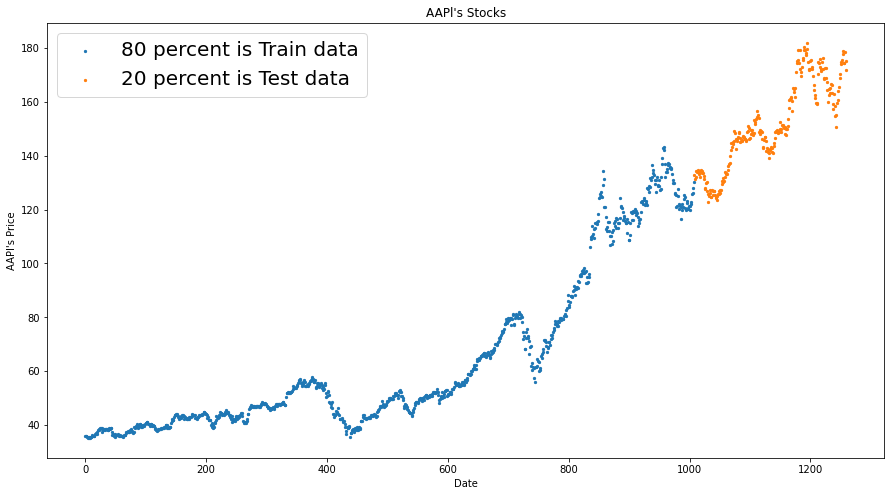

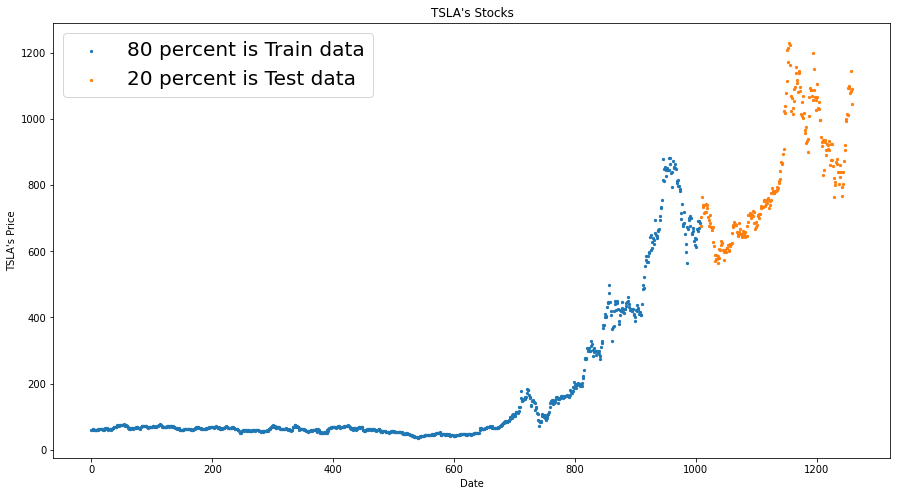

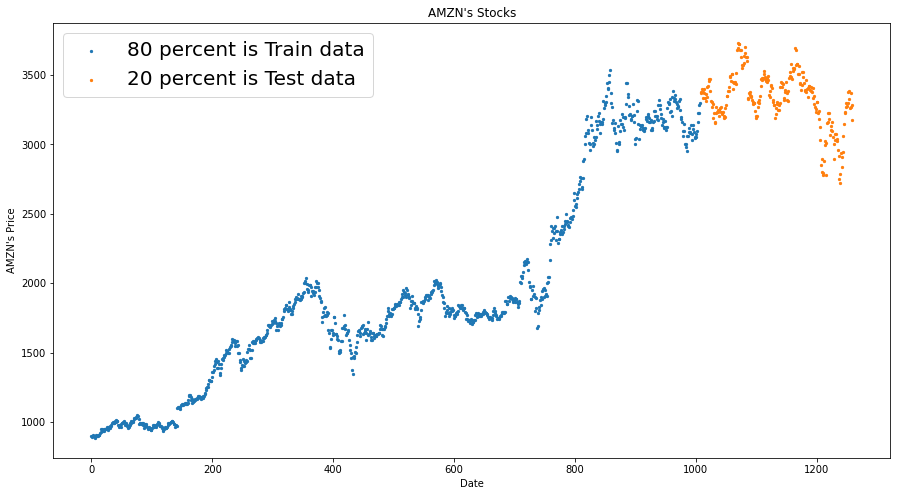

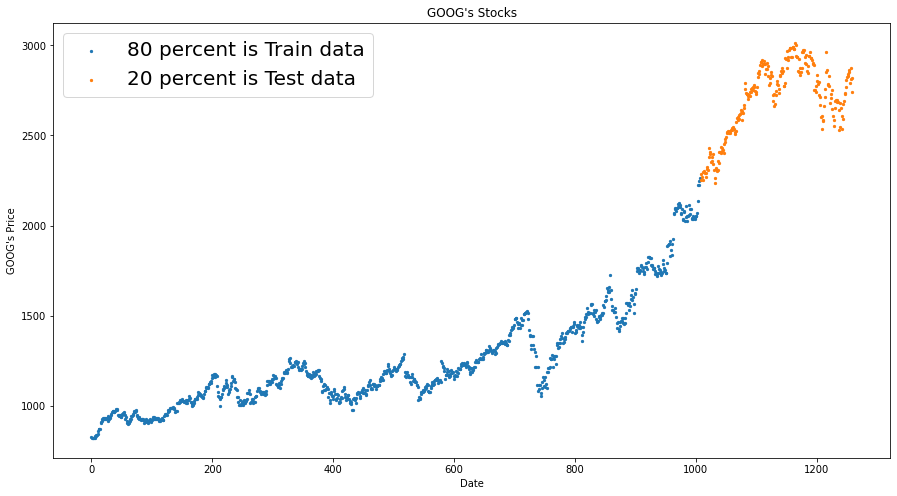

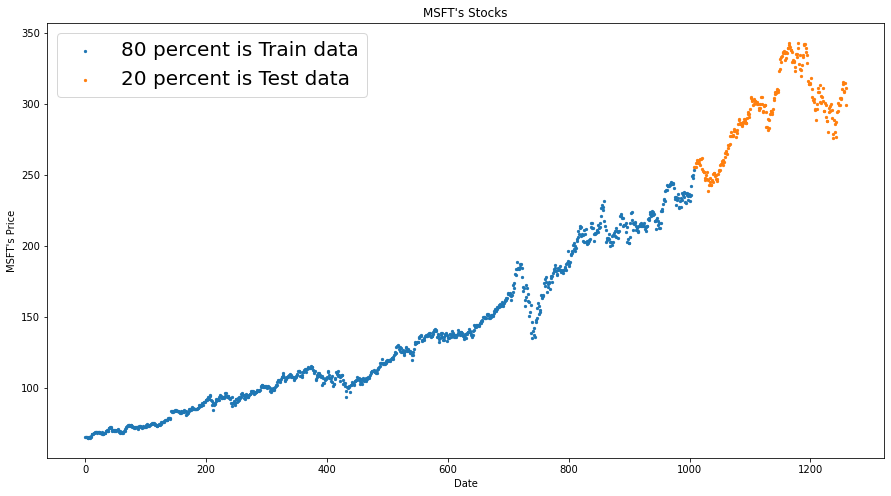

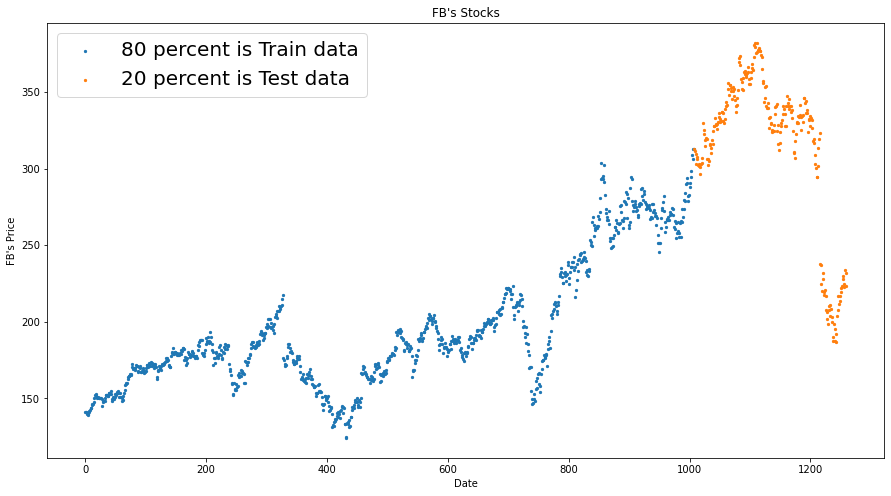

In [82]:
amount = float(input("Recommended 50 to 80 percent of data \n\
What full number or percent do you want to predict with?: "))
# if user entered number lower than 1 then it's a decimal float (example: .70)
# that's is already prepared if it's a number over 1 like 50 then it's going
# it be divide by 100 so it would be prepared for the split train amount
# if the user's number is less than 0, then it's a negative number which
# will turn postive by multiplying the number with negative one. 
##  ⬇⬇⬇
if amount < 0:
  amount = amount  * -1 
if amount < 1:
  amount = amount * 100
if amount > 1:
  amount = amount / 100 
#   ⬆⬆⬆
for i in range(0,len(tickers)):
  try:
    # spliting all of ticker data by user amount given ⬇⬇⬇
    split_size = int(amount * len(pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"]))
    # Assignment the varibles made earlier into the Dataframes' Train, test splits ⬇⬇⬇
    globals()[X_train[i]], globals()[X_test[i]] =  timesteps[:split_size], timesteps[split_size:]
    globals()[y_train[i]] =  (pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"])[split_size:]
    globals()[y_test[i]] =  (pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"])[:split_size]
    # matplotlib graph properties ⬇⬇⬇
    plt.figure(figsize=(15, 8))              # display percentage of train and test data
    plt.scatter(globals()[X_train[i]], globals()[y_test[i]], s=5, label=f"{int(amount * 100)} percent is Train data")
    plt.scatter(globals()[X_test[i]], globals()[y_train[i]], s=5, label=f"{100-(int(amount * 100))} percent is Test data")
    plt.xlabel("Date")
    plt.ylabel(f"{tickers[i]}'s Price") # Change ylabel name into given companies name's Price
    plt.title(f"{tickers[i]}'s Stocks") # Change ylabel name into given companies name's Stocks 
    plt.legend(fontsize=20)
    sucess = True # check if graphing is sucessful 
  except:
    if sucess == False:
      print("There is an error in the train test distrution due to inconsistent days")
      print("After various tests, companies for example: 2222.SR have errors on dataset")
      print("You can either replace selected company or remove it all together")
    # matplotlib graph properties ⬆⬆⬆
plt.show()
# note: if block crashes, one of the companies have inconsistent days of stock data
# for example the csv can't collect all of those chosen days 